<a href="https://colab.research.google.com/github/TuanNguyenDin/Restaurant-Tips-Analysis/blob/main/Restaurant_tips_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍽️ Restaurant Tips Analysis**

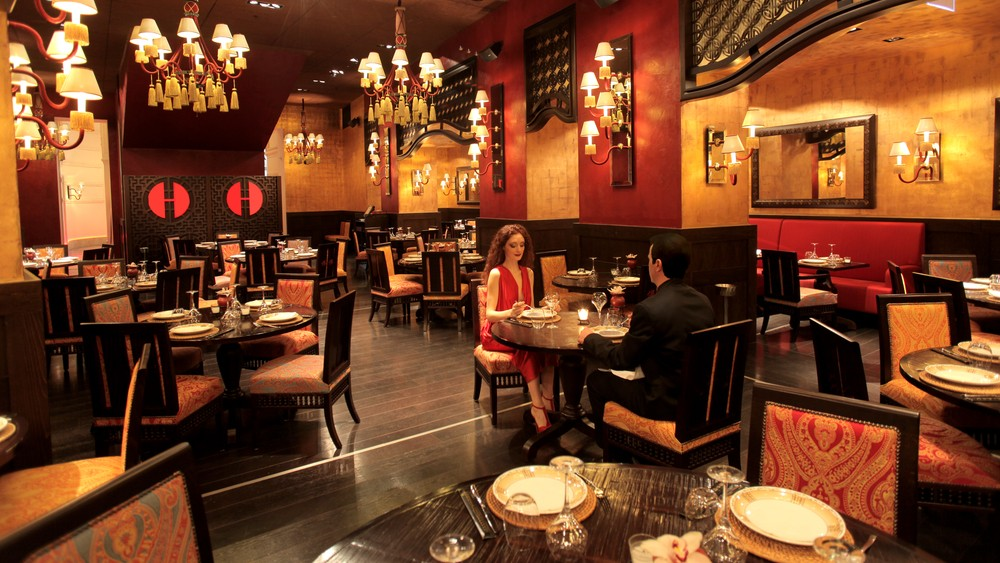

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
url='https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv'
df=pd.read_csv(url)

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), string(4)
memory usage: 15.4 KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

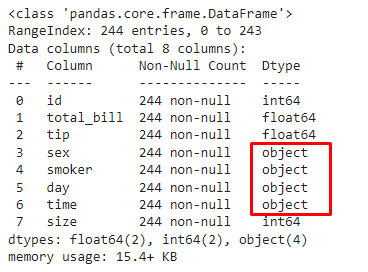

Let's fix their types and make them string:

In [ ]:
# df['sex'] = df['sex'].astype('string')
# df['smoker'] = df['smoker'].astype('string')
# df['day'] = df['day'].astype('string')
# df['time'] = df['time'].astype('string')
string_cols = ['sex', 'smoker', 'day', 'time']
for col in string_cols:
    df[col] = df[col].astype('string')

Check again (output columns and their types):

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), string(4)
memory usage: 15.4 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
df.describe()

,id,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
210,210,30.06,2.00,Male,Yes,Sat,Dinner,3
98,98,21.01,3.00,Male,Yes,Fri,Dinner,2
93,93,16.32,4.30,Female,Yes,Fri,Dinner,2
182,182,45.35,3.50,Male,Yes,Sun,Dinner,3
206,206,26.59,3.41,Male,Yes,Sat,Dinner,3


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
104,104,20.92,4.08,Female,No,Sat,Dinner,2
129,129,22.82,2.18,Male,No,Thur,Lunch,3
108,108,18.24,3.76,Male,No,Sat,Dinner,2
45,45,18.29,3.00,Male,No,Sun,Dinner,2
54,54,25.56,4.34,Male,No,Sun,Dinner,4


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
smokers_values = map(lambda x: round(x, 4), smokers_values)

smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. The minimum value (min) of the Common, Smokers and Non-smokers groups is 1.000000. The maximum value (max) of the Common and Smokers groups is 10.000000, while the maximum value of the Non-smokers group is lower, only 9.000000.
2. The mean value of the Smokers group (3.00871) is the highest, followed by Common (2.998279), and the lowest is Non-smokers (2.991854). The median value of the Smokers group (3.00000) is also the highest, followed by Common (2.90000), and the lowest is Non-smokers (2.740000).

**General conclusion:**
 Both measures of central tendency (mean and median) show that the Smokers group tends to have slightly higher values ​​than the Non-smokers group.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

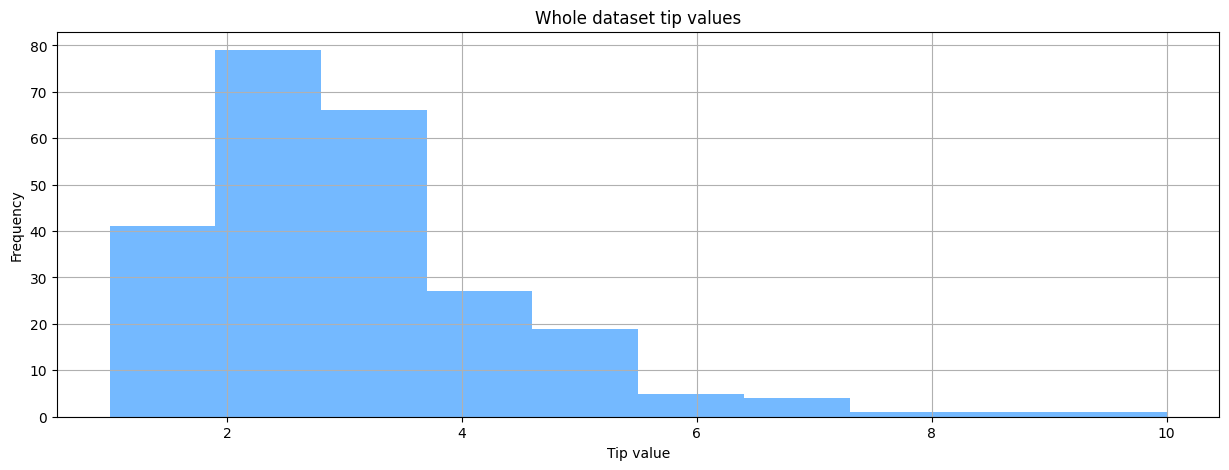

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(
    df['tip'],
    color='#74b9ff'
)
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

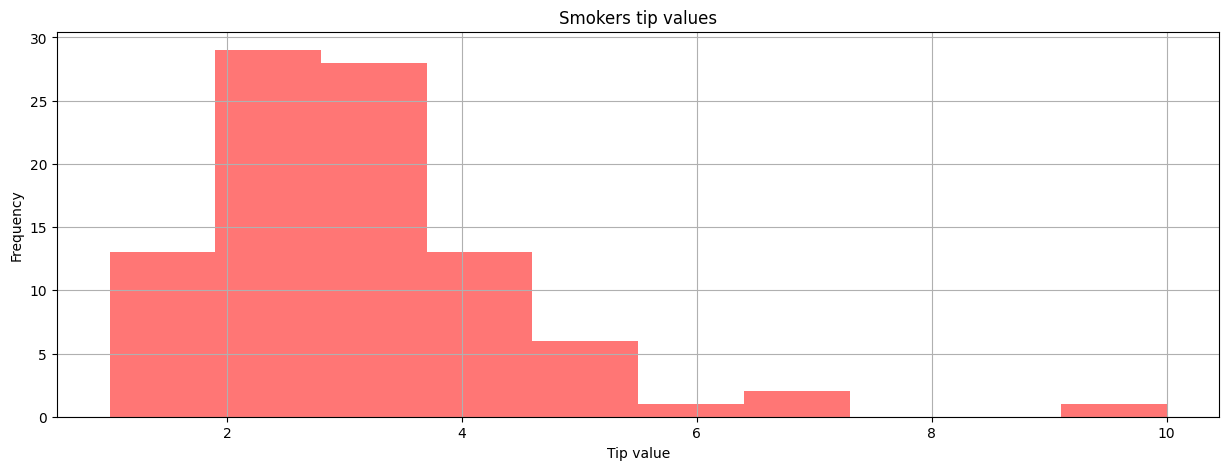

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(
    smokers_df['tip'],
    color='#ff7675'
)
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

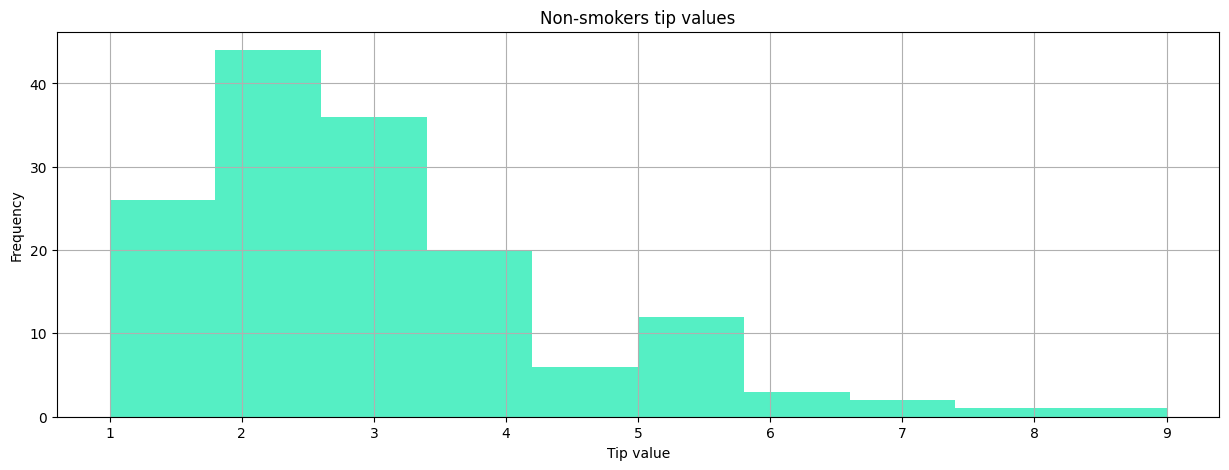

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(
    non_smokers_df['tip'],
    color='#55efc4'
    )
plt.title('Non-smokers tip values')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

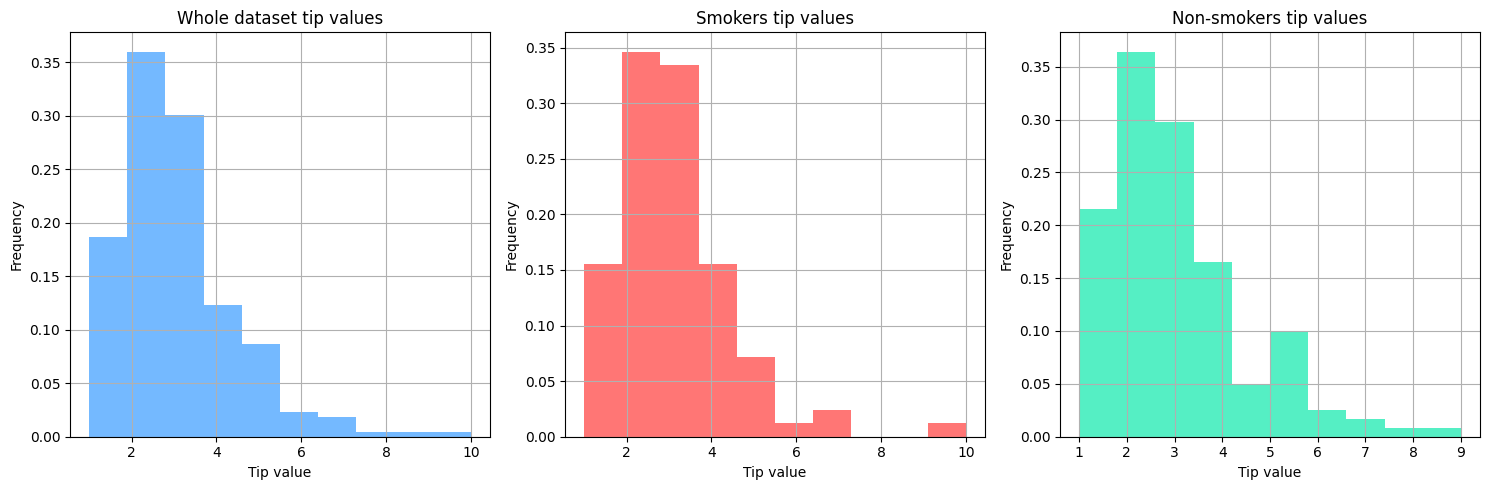

In [ ]:
list_df=[df, smokers_df, non_smokers_df]
list_color=['#74b9ff', '#ff7675', '#55efc4']
list_title=['Whole dataset tip values', 'Smokers tip values', 'Non-smokers tip values']
xlabel='Tip value'
ylabel='Frequency'

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].hist(list_df[i]['tip'], color=list_color[i], density=True)
    axs[i].set_title(list_title[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel(ylabel)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. The distribution of tip values ​​shows that the majority of transactions have low tip values ​​(strongly concentrated between 2 and 4). Smokers seem to have a few instances of very high tips (close to 10) that are enough to shift the mean and median, while Non-smokers have a distribution more concentrated at low values ​​and a narrower range of maximum tips.

**General conclusion:**
 Smokers are predicted to tip more.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

Create a new dataframe `male_df` containing only info about male customers.

In [ ]:
male_df = df[df['sex']=='Male']
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
231,231,15.69,3.00,Male,Yes,Sat,Dinner,3
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
141,141,34.30,6.70,Male,No,Thur,Lunch,6
185,185,20.69,5.00,Male,No,Sun,Dinner,5
42,42,13.94,3.06,Male,No,Sun,Dinner,2


Create a new dataframe `female_df` containing only info about Female customers.

In [ ]:
female_df=df[df['sex']=='Female']
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
4,4,24.59,3.61,Female,No,Sun,Dinner,4
223,223,15.98,3.00,Female,No,Fri,Lunch,3
131,131,20.27,2.83,Female,No,Thur,Lunch,2
164,164,17.51,3.00,Female,Yes,Sun,Dinner,2
136,136,10.33,2.00,Female,No,Thur,Lunch,2


Calculate measures of central tendency for the whole dataset:

In [ ]:
male_min_tip = male_df['tip'].min()
male_max_tip = male_df['tip'].max()
female_min_tip = female_df['tip'].min()
female_max_tip = female_df['tip'].max()
male_mean_tip = male_df['tip'].mean()
male_median_tip = male_df['tip'].median()
female_mean_tip = female_df['tip'].mean()
female_median_tip = female_df['tip'].median()

all_vals_dict = {
    'Male': {'min': male_min_tip, 'max': male_max_tip, 'mean': male_mean_tip, 'median': male_median_tip},
    'Female': {'min': female_min_tip, 'max': female_max_tip, 'mean': female_mean_tip, 'median': female_median_tip}
}

all_mct = pd.DataFrame(all_vals_dict)
all_mct


,Male,Female
min,1.000000,1.000000
max,10.000000,6.500000
mean,3.089618,2.833448
median,3.000000,2.750000


 Male tend to leave tips with a higher average value than Female. This difference is mainly caused by Male having a few cases of leaving extremely large tips up to 10,000,000, while Female's maximum tip is only 6,500,000.

Draw histogram for male and female tip

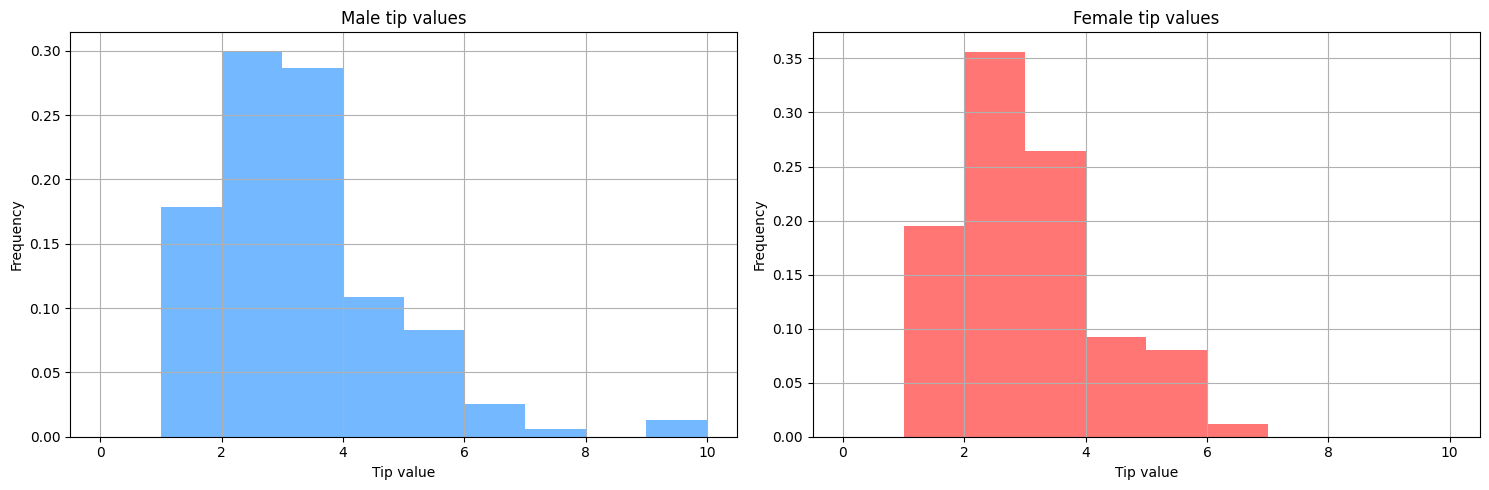

In [ ]:

list_df=[male_df, female_df]
list_color=['#74b9ff', '#ff7675']
hist_title = ['Male tip values', 'Female tip values']
xlabel='Tip value'
ylabel='Frequency'

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
bins = np.arange(0, 10.5, 1)
for i in range(2):
    axs[i].hist(list_df[i]['tip'], color=list_color[i], bins=bins, density=True)
    axs[i].set_title(hist_title[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel(ylabel)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

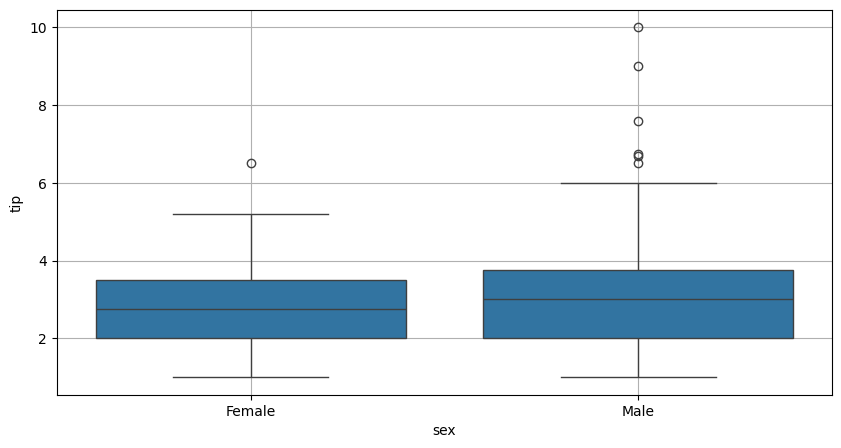

In [ ]:

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='sex',
    y='tip'
)
plt.grid(True)
plt.show()

Men tend to give more tips than women.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

Create a new dataframe `weekends_tip` containing only info about customer booking in weekends day.

In [4]:
weekend_tip = df[df['day'].isin(['Sat', 'Sun'])]
weekend_tip.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
182,182,45.35,3.50,Male,Yes,Sun,Dinner,3
233,233,10.77,1.47,Male,No,Sat,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
180,180,34.65,3.68,Male,Yes,Sun,Dinner,4
62,62,11.02,1.98,Male,Yes,Sat,Dinner,2


Create a new dataframe `weeks_tip` containing only info about customer booking in week not include weekends.

In [11]:
week_tip= df[~df['day'].isin(['Sat', 'Sun'])]
week_tip.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
122,122,14.26,2.5,Male,No,Thur,Lunch,2
118,118,12.43,1.8,Female,No,Thur,Lunch,2
199,199,13.51,2.0,Male,Yes,Thur,Lunch,2
198,198,13.00,2.0,Female,Yes,Thur,Lunch,2
130,130,19.08,1.5,Male,No,Thur,Lunch,2


Draw a chart to compare weekday and weekend tips

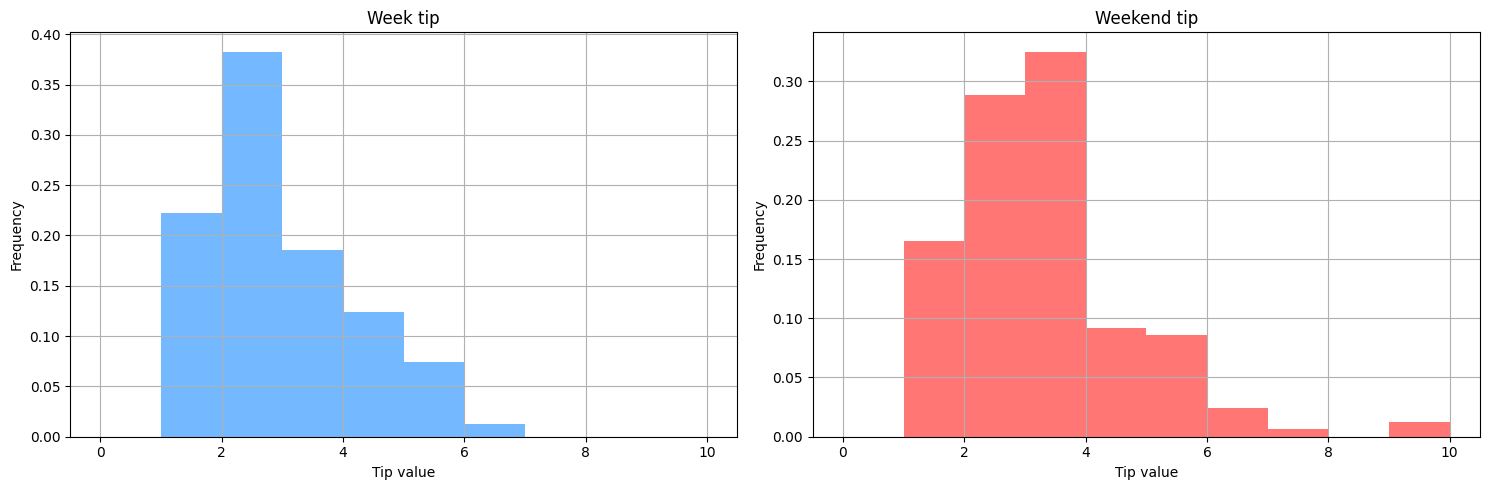

In [13]:
list_day_df = [week_tip, weekend_tip]
list_color = ['#74b9ff', '#ff7675']
list_title = ['Week tip', 'Weekend tip']
xlabel = 'Tip value'
ylabel = 'Frequency'

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(2):
    axs[i].hist(list_day_df[i]['tip'], color=list_color[i], bins=np.arange(0, 10.5, 1), density=True)
    axs[i].set_title(list_title[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel(ylabel)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

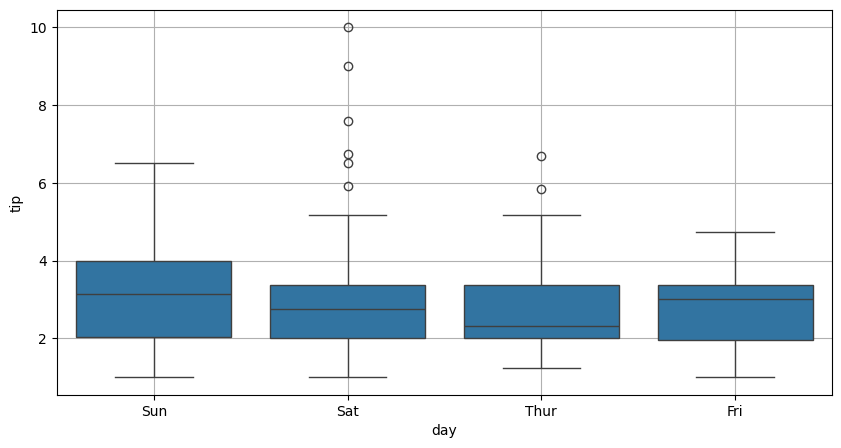

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='day',
    y='tip'
)
plt.grid(True)
plt.show()

 * There are very few high value tips on weekdays, almost zero after 7. Additionally, there are many high value outliers on weekends.

 * The weekend tip distribution appears to be wider and less concentrated than weekday tips.

 *In conclusion, weekend tips tend to be higher and more volatile (due to the presence of very high value tips) than weekday tips.*

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

Create dataframe `dinners_time_df`

In [16]:
dinners_time_df = df[df['time'] == 'Dinner']
dinners_time_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
169,169,10.63,2.00,Female,Yes,Sat,Dinner,2
217,217,11.59,1.50,Male,Yes,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
63,63,18.29,3.76,Male,Yes,Sat,Dinner,4
15,15,21.58,3.92,Male,No,Sun,Dinner,2


Draw histogram to compare

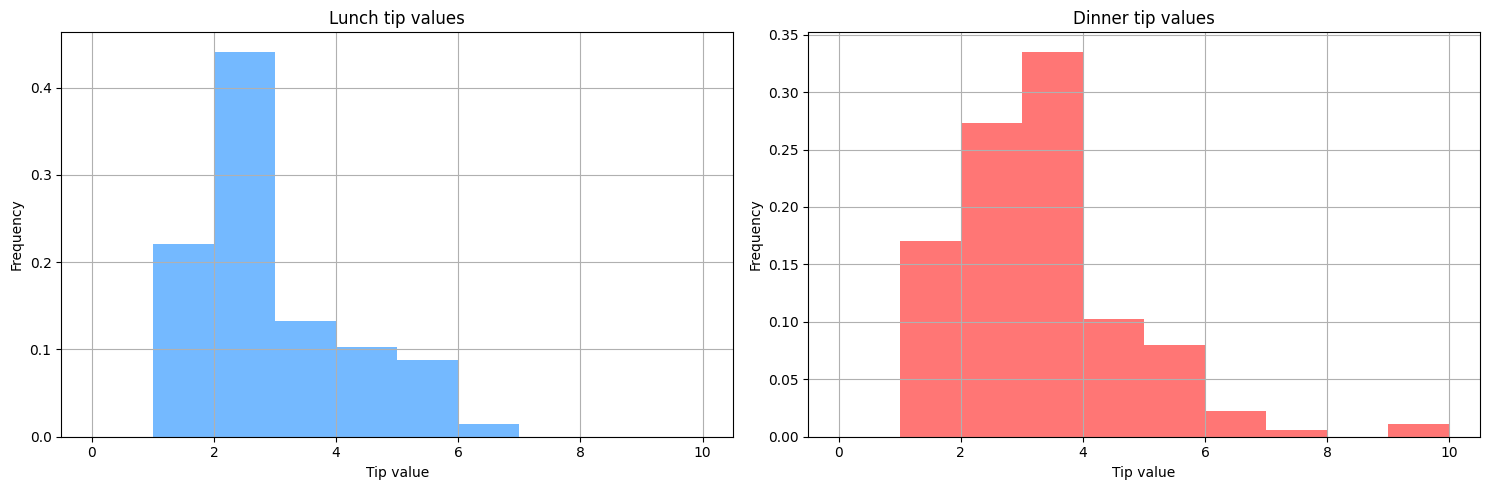

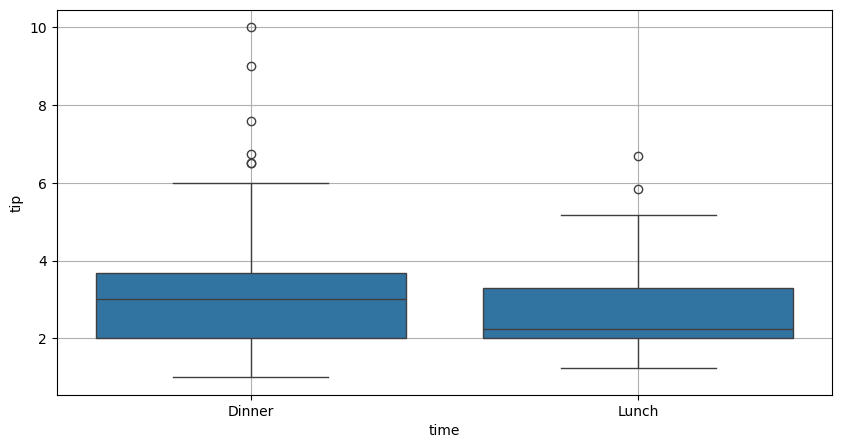

In [17]:
lunch_time_df = df[df['time'] == 'Lunch']

list_time_df = [lunch_time_df, dinners_time_df]
list_color = ['#74b9ff', '#ff7675']
list_title = ['Lunch tip values', 'Dinner tip values']
xlabel = 'Tip value'
ylabel = 'Frequency'

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
bins = np.arange(0, 10.5, 1)
for i in range(2):
    axs[i].hist(list_time_df[i]['tip'], color=list_color[i], bins=bins, density=True)
    axs[i].set_title(list_title[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel(ylabel)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='time',
    y='tip'
)
plt.grid(True)
plt.show()

The frequency, mean and maximum values ​of tips for Dinner time are higher than the other